In [53]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [54]:
root_dir = r"/Users/tharhtet/Documents/github/Practical-ML-by-WAI/6_deep_learning/CNN/cats_and_dogs_filtered"

In [75]:
BATCH_SIZE  = 32
EPOCHS = 20
input_img_size = (128,128)
input_shape = (128,128,3)

In [76]:
tf_generator =  tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0,
)

In [77]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    root_dir+"/train",
    image_size=input_img_size,
    batch_size=BATCH_SIZE,
    label_mode='binary'  # or 'categorical'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    root_dir+"/train",
    image_size=input_img_size,
    batch_size=BATCH_SIZE,
    label_mode='binary'  # or 'categorical'
)

Found 2752 files belonging to 2 classes.
Found 2752 files belonging to 2 classes.


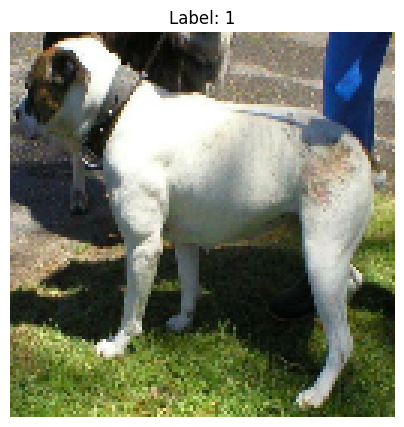

In [78]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(5,5))
    plt.imshow(images[0].numpy() / 255.)  # normalize if not already
    plt.title(f"Label: {int(labels[0])}")
    plt.axis('off')
    plt.show()
    break

In [83]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu"),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(256,activation="relu"),
    Dense(128,activation="relu"),
    Dense(1,activation='softmax')
    
])

/Users/tharhtet/.local/share/virtualenvs/6_deep_learning-3jfSPIh1/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 59, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 53824)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    13,779,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,868,545 (52.90 MB)

 Trainable params: 13,868,545 (52.90 MB)

 Non-trainable params: 0 (0.00 B)

In [85]:
history = model.fit(train_ds,epochs=EPOCHS, validation_data=val_ds,verbose=1)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.5012 - loss: 345.4983 - val_accuracy: 0.5036 - val_loss: 6.4934
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.4982 - loss: 1.9306 - val_accuracy: 0.5036 - val_loss: 1.9074
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.5020 - loss: 28.2104 - val_accuracy: 0.5036 - val_loss: 106.7414
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.5038 - loss: 32.6849 - val_accuracy: 0.5036 - val_loss: 33.5739
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.5016 - loss: 19.4663 - val_accuracy: 0.5036 - val_loss: 6.1228
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.4958 - loss: 6.6473 - val_accuracy: 0.5036 - val_loss: 5.0596
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.4979 - loss: 7.4091 - val_accuracy: 0.5036 - val_loss: 45.5980
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.5031 - loss: 21.5724 - val_accuracy: 

In [86]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5049 - loss: 458.2409
Validation Loss: 474.8554
Validation Accuracy: 0.5036


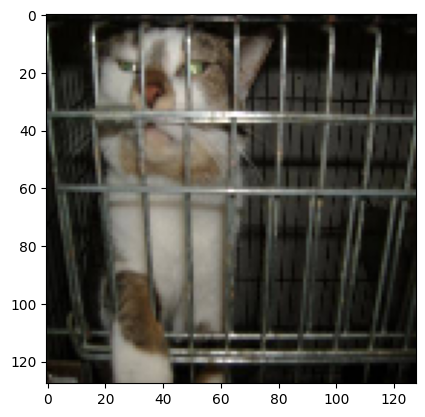

In [92]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r"/Users/tharhtet/Documents/github/Practical-ML-by-WAI/6_deep_learning/CNN/cats_and_dogs_filtered/test/cats/cat.2366.jpg"
img = image.load_img(img_path, target_size=input_img_size)
img_array = image.img_to_array(img)  # shape: (_, _, 3)
img_array = img_array / 255.0        # normalize
img_array = np.expand_dims(img_array, axis=0)  # shape: (1, _, _, 3)
plt.imshow(img_array[0])  # Display the image

In [93]:
class_names = train_dataset.class_indices
print("Class names found:", class_names)

Class names found: {'cats': 0, 'dogs': 1}


In [94]:
prediction = model.predict(img_array)[0][0]
class_name = "cats" if prediction > 0.5 else "dogs"
print(f"Predicted class: {class_name} with confidence {prediction:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted class: cats with confidence 1.00
